# Pruebas de Bondad de Ajuste

In [12]:
import scipy.stats as st
import pandas as pd
import numpy as np
%matplotlib inline

In [13]:
excel_data = pd.read_excel('interarrival_times.xlsx')
excel_data.head()

,obs,tiempo
0,1,0.25
1,2,0.10
2,3,0.08
3,4,0.01
4,5,1.17


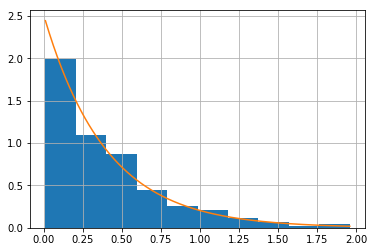

In [14]:
times = excel_data['tiempo']
histogram = times.hist(normed=True)
val = np.linspace(times.min(),times.max(),1000)
histogram.plot(val,st.expon(scale=times.mean()).pdf(val))

## $\chi^2$ test

In [15]:
x = st.expon(scale=times.mean())
k = 8
a = [x.ppf(0)]
for j in range(1, k + 1):
    a.append(x.ppf(j / k))
a

[0.0,
 0.053254026629341568,
 0.11473128862072392,
 0.18744345652202071,
 0.27643595776303931,
 0.39116724638376321,
 0.55287191552607862,
 0.82930787328911781,
 inf]

In [16]:
frec_obs, _ = np.histogram(times, bins=a)
frec_obs

array([29, 34, 18, 29, 22, 34, 23, 30], dtype=int64)

In [17]:
st.chisquare(frec_obs)

Power_divergenceResult(statistic=8.6164383561643838, pvalue=0.28137921388956866)

## K-S Test

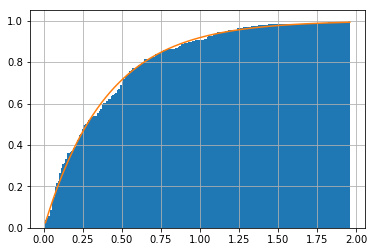

In [18]:
cum_hist = times.hist(normed=True, cumulative=1, bins=200)
cum_hist.plot(val,x.cdf(val))

In [19]:
st.kstest(times, x.cdf)

KstestResult(statistic=0.047253060906787214, pvalue=0.7291757713333693)

In [20]:
st.kstest(times, 'expon', args=(0, times.mean()))

KstestResult(statistic=0.047253060906787214, pvalue=0.7291757713333693)

## A-D Test

In [21]:
st.anderson(times, 'expon')

AndersonResult(statistic=0.55790820368821414, critical_values=array([ 0.919,  1.075,  1.337,  1.602,  1.952]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))